In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 

In [83]:
account = pd.read_csv('account.asc', sep=';')
card = pd.read_csv('card.asc', sep=';')
client = pd.read_csv('client.asc', sep=';')
disp = pd.read_csv('disp.asc', sep=';')
district = pd.read_csv('district.asc', sep=';')
loan = pd.read_csv('loan.asc', sep=';')
order = pd.read_csv('order.asc', sep=';')
trans = pd.read_csv('trans.csv', sep=';', low_memory=False)

In [84]:
# An insight on the columns and their dtype

account.info()
card.info()
client.info()
disp.info()
district.info()
loan.info()
order.info()
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   account_id   4500 non-null   int64 
 1   district_id  4500 non-null   int64 
 2   frequency    4500 non-null   object
 3   date         4500 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 140.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   card_id  892 non-null    int64 
 1   disp_id  892 non-null    int64 
 2   type     892 non-null    object
 3   issued   892 non-null    object
dtypes: int64(2), object(2)
memory usage: 28.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   client_id     5369 non-nul

### Client Information

##### client_id, gender, age

In [85]:
client.head()

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5


In [86]:
# Client_id 
""" Gotten from the client id """

client_id = client.client_id

In [87]:
# Gender
""" Calculated from client table decoding the 4th and 5th number, where if it's above 50 female otherwise male """

client['gender'] = client.birth_number.astype(str).str[3:5].astype(int)

client['gender'] = np.where(client.gender > 50, 'female', 'male')


In [88]:
# Age
""" Calculated from client table decoding, where age is derived from subtracting the first 2 numbers in datetime format by 2023 """

current_year = datetime.now().year

client['age'] = '19' + client.birth_number.astype(str).str[:2]

client.age = current_year - client.age.astype(int)

# Use chronological age

In [89]:
client.head()

,client_id,birth_number,district_id,gender,age
0,1,706213,18,male,53
1,2,450204,1,male,78
2,3,406009,1,male,83
3,4,561201,5,male,67
4,5,605703,5,female,63


In [90]:
client = client.drop('birth_number', axis=1)

client

,client_id,district_id,gender,age
0,1,18,male,53
1,2,1,male,78
2,3,1,male,83
3,4,5,male,67
4,5,5,female,63
...,...,...,...,...
5364,13955,1,male,78
5365,13956,1,male,80
5366,13968,61,male,55
5367,13971,67,male,61


### Transaction Information

#####  avg_trans_per_month

In [91]:
# average transaction per month

""" Amount calculated from the date column in transaction table """

trans.date = pd.to_datetime(trans.date).dt.strftime('%Y-%m')

avg_trans_month = trans.groupby(['account_id', 'date'])['trans_amount'].sum().reset_index()

avg_trans_client = avg_trans_month.groupby('account_id')['trans_amount'].mean().reset_index()

client_b = avg_trans_client.set_index('account_id')['trans_amount']
trans['avg_trans_permonth'] = round(trans.account_id.map(client_b), 2)

In [92]:
trans_dropped = ['Unnamed: 0', 'date', 'trans_amount', 'balance_after_trans', 'trans_bank_partner', 'trans_account_partner', 'trans_k_symbol']

trans = trans.drop(trans_dropped, axis=1)
trans.head()

,trans_id,account_id,trans_type,trans_operation,avg_trans_permonth
0,695247,2378,Credit,Credit in cash,73832.92
1,171812,576,Credit,Credit in cash,12161.38
2,207264,704,Credit,Credit in cash,37151.24
3,1117247,3818,Credit,Credit in cash,38238.84
4,579373,1972,Credit,Credit in cash,10452.12


### Working_df =  Account, Disposition and Credit Card Information

##### years_since_creditcard, class, classic, gold, junior, statement_monthly, statement_transaction, statement_weekly, account_year
##### disponent_account, owner_account

In [93]:
# Merging account, disp and creditcard tables 

merge_df = pd.merge(account, disp, how='inner', on='account_id')

working_df = pd.merge(merge_df, card, how='inner', on='disp_id')

working_df

,account_id,district_id,frequency,date,disp_id,client_id,type_x,card_id,type_y,issued
0,1695,76,POPLATEK MESICNE,930103,2058,2058,OWNER,321,gold,980816 00:00:00
1,2099,3,POPLATEK TYDNE,930112,2542,2542,OWNER,405,classic,980831 00:00:00
2,3909,1,POPLATEK MESICNE,930114,4715,4715,OWNER,725,junior,960330 00:00:00
3,4034,1,POPLATEK MESICNE,930118,4862,4862,OWNER,743,gold,981018 00:00:00
4,212,27,POPLATEK TYDNE,930120,255,255,OWNER,40,classic,961013 00:00:00
...,...,...,...,...,...,...,...,...,...,...
887,2796,5,POPLATEK TYDNE,971208,3378,3378,OWNER,531,gold,980824 00:00:00
888,276,38,POPLATEK MESICNE,971208,333,333,OWNER,53,classic,981013 00:00:00
889,1156,59,POPLATEK MESICNE,971209,1390,1390,OWNER,231,junior,980929 00:00:00
890,134,34,POPLATEK MESICNE,971210,161,161,OWNER,26,classic,980914 00:00:00


In [94]:
# years_since_creditcard

""" To get the year credit card was issued """

working_df['creditcard_issued'] = working_df.issued.astype(str).str[:4]

working_df.creditcard_issued = pd.to_datetime(working_df.creditcard_issued, format='%y%m').dt.strftime('%Y-%m')


In [95]:
# account_year

""" To calculate the year the account was opened """

working_df['account_year'] = working_df.date.astype(str).str[:4]
working_df.account_year = pd.to_datetime(working_df.account_year, format='%y%m').dt.strftime('%Y-%m')

working_df.head()

,account_id,district_id,frequency,date,disp_id,client_id,type_x,card_id,type_y,issued,creditcard_issued,account_year
0,1695,76,POPLATEK MESICNE,930103,2058,2058,OWNER,321,gold,980816 00:00:00,1998-08,1993-01
1,2099,3,POPLATEK TYDNE,930112,2542,2542,OWNER,405,classic,980831 00:00:00,1998-08,1993-01
2,3909,1,POPLATEK MESICNE,930114,4715,4715,OWNER,725,junior,960330 00:00:00,1996-03,1993-01
3,4034,1,POPLATEK MESICNE,930118,4862,4862,OWNER,743,gold,981018 00:00:00,1998-10,1993-01
4,212,27,POPLATEK TYDNE,930120,255,255,OWNER,40,classic,961013 00:00:00,1996-10,1993-01


In [96]:
# year_difference

""" Difference between opening an account and getting a credit card  """

working_df['creditcard_issued'] = pd.to_datetime(working_df['creditcard_issued'])
working_df['account_year'] = pd.to_datetime(working_df['account_year'])

working_df['years_difference'] = (working_df['creditcard_issued'] - working_df['account_year']).dt.days // 365

working_df.head()

,account_id,district_id,frequency,date,disp_id,client_id,type_x,card_id,type_y,issued,creditcard_issued,account_year,years_difference
0,1695,76,POPLATEK MESICNE,930103,2058,2058,OWNER,321,gold,980816 00:00:00,1998-08-01,1993-01-01,5
1,2099,3,POPLATEK TYDNE,930112,2542,2542,OWNER,405,classic,980831 00:00:00,1998-08-01,1993-01-01,5
2,3909,1,POPLATEK MESICNE,930114,4715,4715,OWNER,725,junior,960330 00:00:00,1996-03-01,1993-01-01,3
3,4034,1,POPLATEK MESICNE,930118,4862,4862,OWNER,743,gold,981018 00:00:00,1998-10-01,1993-01-01,5
4,212,27,POPLATEK TYDNE,930120,255,255,OWNER,40,classic,961013 00:00:00,1996-10-01,1993-01-01,3


In [97]:
working_df_drop = ['frequency', 'date', 'issued', 'creditcard_issued', 'years_difference']

working_df = working_df.drop(working_df_drop, axis=1)

working_df

,account_id,district_id,disp_id,client_id,type_x,card_id,type_y,account_year
0,1695,76,2058,2058,OWNER,321,gold,1993-01-01
1,2099,3,2542,2542,OWNER,405,classic,1993-01-01
2,3909,1,4715,4715,OWNER,725,junior,1993-01-01
3,4034,1,4862,4862,OWNER,743,gold,1993-01-01
4,212,27,255,255,OWNER,40,classic,1993-01-01
...,...,...,...,...,...,...,...,...
887,2796,5,3378,3378,OWNER,531,gold,1997-12-01
888,276,38,333,333,OWNER,53,classic,1997-12-01
889,1156,59,1390,1390,OWNER,231,junior,1997-12-01
890,134,34,161,161,OWNER,26,classic,1997-12-01


### Loan Information

##### loan_amount, loan_duration, loan_complete_paid, loan_complete_unpaid, loan_contract_running, loan_client_debt

In [98]:
# loan_amount

""" Getting the loan amount """

loan.amount

0       96396
1      165960
2      127080
3      105804
4      274740
        ...  
677    352704
678     52512
679    139488
680     55632
681    240900
Name: amount, Length: 682, dtype: int64

In [99]:
# Loan_duration

""" Getting the loan duration """

loan.duration

0      12
1      36
2      60
3      36
4      60
       ..
677    48
678    12
679    24
680    24
681    60
Name: duration, Length: 682, dtype: int64

In [100]:
# decode the loan status 

""" Changing the variables in the Loan Status """

# df['status'] = df['status'].map(status_mapping).fillna(df['status'])

status_mapping = {
    'A': 'loan_complete_paid',
    'B': 'loan_complete_unpaid',
    'C': 'loan_contract_running',
    'D': 'loan_client_debt'
}

loan.status = loan.status.map(status_mapping).fillna(loan.status)

loan.head()

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,loan_complete_unpaid
1,5316,1801,930711,165960,36,4610.0,loan_complete_paid
2,6863,9188,930728,127080,60,2118.0,loan_complete_paid
3,5325,1843,930803,105804,36,2939.0,loan_complete_paid
4,7240,11013,930906,274740,60,4579.0,loan_complete_paid


In [101]:
loan_drop = ['date', 'payments']

loan = loan.drop(loan_drop, axis=1)
loan

,loan_id,account_id,amount,duration,status
0,5314,1787,96396,12,loan_complete_unpaid
1,5316,1801,165960,36,loan_complete_paid
2,6863,9188,127080,60,loan_complete_paid
3,5325,1843,105804,36,loan_complete_paid
4,7240,11013,274740,60,loan_complete_paid
...,...,...,...,...,...
677,4989,105,352704,48,loan_contract_running
678,5221,1284,52512,12,loan_contract_running
679,6402,6922,139488,24,loan_contract_running
680,5346,1928,55632,24,loan_contract_running


### Permanent Order Information

##### debit_frequency

In [102]:
order 

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER
2,29403,2,QR,13943797,7266.0,SIPO
3,29404,3,WX,83084338,1135.0,SIPO
4,29405,3,CD,24485939,327.0,
...,...,...,...,...,...,...
6466,46334,11362,YZ,70641225,4780.0,SIPO
6467,46335,11362,MN,78507822,56.0,
6468,46336,11362,ST,40799850,330.0,POJISTNE
6469,46337,11362,KL,20009470,129.0,


In [103]:
# Group the data by account_id and count the number of permanent orders per client
""" Frequency calculated for debit """

order['debit_frequency'] = order.groupby('account_id')['order_id'].count()

order.head()

,order_id,account_id,bank_to,account_to,amount,k_symbol,debit_frequency
0,29401,1,YZ,87144583,2452.0,SIPO,NaN
1,29402,2,ST,89597016,3372.7,UVER,1.0
2,29403,2,QR,13943797,7266.0,SIPO,2.0
3,29404,3,WX,83084338,1135.0,SIPO,3.0
4,29405,3,CD,24485939,327.0,,2.0


In [104]:
order_dropped = ['bank_to', 'account_to', 'amount', 'k_symbol', 'order_id']

order = order.drop(order_dropped, axis=1)


### Demography Information

##### region, region_avg_unemployment_rate_96, region_avg_salary, region_avg_crime_rate

In [105]:
# region

district = district.rename(columns={
    'A1': 'district_id',
    'A3': 'region'
})

district

,district_id,A2,region,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,Opava,north Moravia,182027,17,49,12,2,7,56.4,8746,3.33,3.74,90,4355,4433
73,74,Ostrava - mesto,north Moravia,323870,0,0,0,1,1,100.0,10673,4.75,5.44,100,18782,18347
74,75,Prerov,north Moravia,138032,67,30,4,2,5,64.6,8819,5.38,5.66,99,4063,4505
75,76,Sumperk,north Moravia,127369,31,32,13,2,7,51.2,8369,4.73,5.88,107,3736,2807


In [106]:
# region average salary 96

""" Generating the average salary of people """
 
average_salary = district.groupby('region')['A11'].mean().reset_index()

salary = average_salary.set_index('region')['A11']
district['average_salary'] = district.region.map(salary)


In [107]:
# region average unemployment rate 96

""" Generating the average number of unemployed of people """

average_unemployment = district.groupby('region')['A13'].mean().reset_index()

unemployment = average_unemployment.set_index('region')['A13']
district['average_unemployment'] = district.region.map(unemployment)


In [108]:
# region average crime rate 96

""" Generating the average crime rate of people """

average_crime = district.groupby('region')['A16'].mean().reset_index()

crime = average_crime.set_index('region')['A16']
district['average_crime'] = district.region.map(crime)

district.head()

,district_id,A2,region,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,average_salary,average_unemployment,average_crime
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107,12541.00,0.430000,99107.000000
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674,9357.25,2.878333,3620.583333
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813,9357.25,2.878333,3620.583333
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892,9357.25,2.878333,3620.583333
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040,9357.25,2.878333,3620.583333


In [109]:
district_column = ['A2', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']

district = district.drop(district_column, axis=1)

district.head()

,district_id,region,average_salary,average_unemployment,average_crime
0,1,Prague,12541.00,0.430000,99107.000000
1,2,central Bohemia,9357.25,2.878333,3620.583333
2,3,central Bohemia,9357.25,2.878333,3620.583333
3,4,central Bohemia,9357.25,2.878333,3620.583333
4,5,central Bohemia,9357.25,2.878333,3620.583333


### Preparation of DataMart

In [110]:
""" Merging the columns needed for the analysis """

first_merge = pd.merge(client, working_df, how='inner', on=['client_id', 'district_id'])

sec_merge = pd.merge(first_merge, loan, how='inner', on='account_id')

trd_merge = pd.merge(order, sec_merge, how='inner', on='account_id')

frth_merge = pd.merge(trd_merge, district, how='inner', on='district_id')

dataset = pd.merge(frth_merge, trans, how='inner', on='account_id')

In [111]:
dataset.head()

,account_id,debit_frequency,client_id,district_id,gender,age,disp_id,type_x,card_id,type_y,...,duration,status,region,average_salary,average_unemployment,average_crime,trans_id,trans_type,trans_operation,avg_trans_permonth
0,97,1.0,116,74,male,81,116,OWNER,16,classic,...,12,loan_complete_paid,north Moravia,9049.181818,5.697273,6174.272727,29886,Credit,Credit in cash,38414.26
1,97,1.0,116,74,male,81,116,OWNER,16,classic,...,12,loan_complete_paid,north Moravia,9049.181818,5.697273,6174.272727,29891,Credit,Credit in cash,38414.26
2,97,1.0,116,74,male,81,116,OWNER,16,classic,...,12,loan_complete_paid,north Moravia,9049.181818,5.697273,6174.272727,3533692,Credit,NaN,38414.26
3,97,1.0,116,74,male,81,116,OWNER,16,classic,...,12,loan_complete_paid,north Moravia,9049.181818,5.697273,6174.272727,30161,Credit,Credit in cash,38414.26
4,97,1.0,116,74,male,81,116,OWNER,16,classic,...,12,loan_complete_paid,north Moravia,9049.181818,5.697273,6174.272727,29892,Credit,Credit in cash,38414.26


### Data Cleaning

In [54]:
dataset_dropped = ['account_id', 'disp_id', 'district_id', 'trans_id']

dataset = dataset.drop(dataset_dropped, axis=1)

In [55]:
dataset.head()

,debit_frequency,client_id,birth_number,gender,age,type_x,card_id,type_y,account_year,loan_id,amount,duration,status,region,average_salary,average_unemployment,average_crime,trans_type,trans_operation,avg_trans_permonth
0,1.0,116,420128,male,81,OWNER,16,classic,1996-05-01,4986,102876,12,loan_complete_paid,north Moravia,9049.181818,5.697273,6174.272727,Credit,Credit in cash,38414.26
1,1.0,116,420128,male,81,OWNER,16,classic,1996-05-01,4986,102876,12,loan_complete_paid,north Moravia,9049.181818,5.697273,6174.272727,Credit,Credit in cash,38414.26
2,1.0,116,420128,male,81,OWNER,16,classic,1996-05-01,4986,102876,12,loan_complete_paid,north Moravia,9049.181818,5.697273,6174.272727,Credit,NaN,38414.26
3,1.0,116,420128,male,81,OWNER,16,classic,1996-05-01,4986,102876,12,loan_complete_paid,north Moravia,9049.181818,5.697273,6174.272727,Credit,Credit in cash,38414.26
4,1.0,116,420128,male,81,OWNER,16,classic,1996-05-01,4986,102876,12,loan_complete_paid,north Moravia,9049.181818,5.697273,6174.272727,Credit,Credit in cash,38414.26


In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86666 entries, 0 to 86665
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   debit_frequency       26068 non-null  float64       
 1   client_id             86666 non-null  int64         
 2   birth_number          86666 non-null  int64         
 3   gender                86666 non-null  object        
 4   age                   86666 non-null  int32         
 5   type_x                86666 non-null  object        
 6   card_id               86666 non-null  int64         
 7   type_y                86666 non-null  object        
 8   account_year          86666 non-null  datetime64[ns]
 9   loan_id               86666 non-null  int64         
 10  amount                86666 non-null  int64         
 11  duration              86666 non-null  int64         
 12  status                86666 non-null  object        
 13  region          

In [57]:
fill_debit = 0
fill_trans_type = 'none'
fill_trans_operation = 'none'

dataset.debit_frequency = dataset.debit_frequency.fillna(fill_debit) 
dataset.trans_type = dataset.trans_type.fillna(fill_trans_type)
dataset.trans_operation = dataset.trans_operation.fillna(fill_trans_operation)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86666 entries, 0 to 86665
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   debit_frequency       86666 non-null  float64       
 1   client_id             86666 non-null  int64         
 2   birth_number          86666 non-null  int64         
 3   gender                86666 non-null  object        
 4   age                   86666 non-null  int32         
 5   type_x                86666 non-null  object        
 6   card_id               86666 non-null  int64         
 7   type_y                86666 non-null  object        
 8   account_year          86666 non-null  datetime64[ns]
 9   loan_id               86666 non-null  int64         
 10  amount                86666 non-null  int64         
 11  duration              86666 non-null  int64         
 12  status                86666 non-null  object        
 13  region          

In [58]:
dataset.account_year = dataset.account_year.dt.strftime('%Y-%m')

In [59]:
columns_to_round = ['average_salary', 'average_unemployment', 'average_crime', 'avg_trans_permonth']

dataset[columns_to_round] = dataset[columns_to_round].round(2)

In [60]:
first_column = 'client_id'

new_column_order = [first_column] + [col for col in dataset.columns if col != first_column]

dataset = dataset[new_column_order]

dataset.head()

,client_id,debit_frequency,birth_number,gender,age,type_x,card_id,type_y,account_year,loan_id,amount,duration,status,region,average_salary,average_unemployment,average_crime,trans_type,trans_operation,avg_trans_permonth
0,116,1.0,420128,male,81,OWNER,16,classic,1996-05,4986,102876,12,loan_complete_paid,north Moravia,9049.18,5.7,6174.27,Credit,Credit in cash,38414.26
1,116,1.0,420128,male,81,OWNER,16,classic,1996-05,4986,102876,12,loan_complete_paid,north Moravia,9049.18,5.7,6174.27,Credit,Credit in cash,38414.26
2,116,1.0,420128,male,81,OWNER,16,classic,1996-05,4986,102876,12,loan_complete_paid,north Moravia,9049.18,5.7,6174.27,Credit,none,38414.26
3,116,1.0,420128,male,81,OWNER,16,classic,1996-05,4986,102876,12,loan_complete_paid,north Moravia,9049.18,5.7,6174.27,Credit,Credit in cash,38414.26
4,116,1.0,420128,male,81,OWNER,16,classic,1996-05,4986,102876,12,loan_complete_paid,north Moravia,9049.18,5.7,6174.27,Credit,Credit in cash,38414.26


In [61]:
dataset.status.unique()

array(['loan_complete_paid', 'loan_contract_running', 'loan_client_debt',
       'loan_complete_unpaid'], dtype=object)

### Data Exploration

In [62]:
dataset.describe()

,client_id,debit_frequency,birth_number,age,card_id,loan_id,amount,duration,average_salary,average_unemployment,average_crime,avg_trans_permonth
count,86666.000000,86666.000000,86666.000000,86666.000000,86666.000000,86666.000000,86666.000000,86666.000000,86666.000000,86666.000000,86666.000000,86666.000000
mean,7040.279129,0.579235,585090.859403,64.784010,786.051393,6159.510881,136492.993931,34.402142,9390.627887,3.554299,14586.993333,68148.983303
std,4089.999557,1.100607,126918.168963,12.678947,341.217539,688.557802,106129.321457,17.446549,1147.649271,1.655800,30077.051376,24493.346063
min,116.000000,0.000000,351003.000000,43.000000,16.000000,4986.000000,12540.000000,12.000000,8611.180000,0.430000,2271.620000,20192.430000
25%,3414.000000,0.000000,476019.000000,54.000000,538.000000,5549.000000,54024.000000,24.000000,8728.500000,2.810000,2786.000000,47646.590000
50%,6764.000000,0.000000,581126.000000,65.000000,855.000000,6147.000000,100128.000000,36.000000,9049.180000,2.980000,3845.790000,67335.810000
75%,10479.000000,1.000000,690217.000000,76.000000,1055.000000,6726.000000,192744.000000,48.000000,9334.200000,5.700000,6174.270000,89389.060000
max,13968.000000,5.000000,806113.000000,88.000000,1247.000000,7305.000000,495180.000000,60.000000,12541.000000,5.860000,99107.000000,147528.100000


### Data Visualisation

##### Regions having most account balance
##### Regions having the most loan defaulters 
##### Relationship between average unemployment rate and the average crime rate in each region
##### Age groups with most frequent credit and withdrawal amounts
##### Gender Distribution across clients
##### Distribution of Average monthly transaction

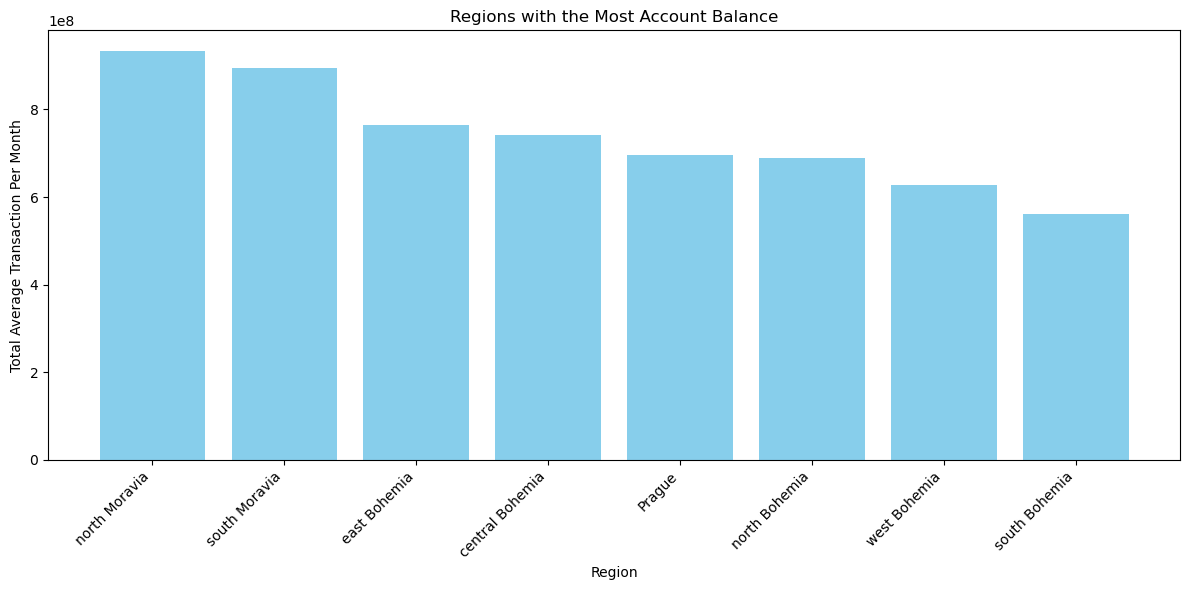

In [63]:
# Regions having most account balance

region_balance = dataset.groupby('region')['avg_trans_permonth'].sum().reset_index()

region_balance = region_balance.sort_values(by='avg_trans_permonth', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(region_balance['region'], region_balance['avg_trans_permonth'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Total Average Transaction Per Month')
plt.title('Regions with the Most Account Balance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### The barchart above shows north Moravia 
#### has the highest transaction per month while, south Bohemia recorded the lowest.

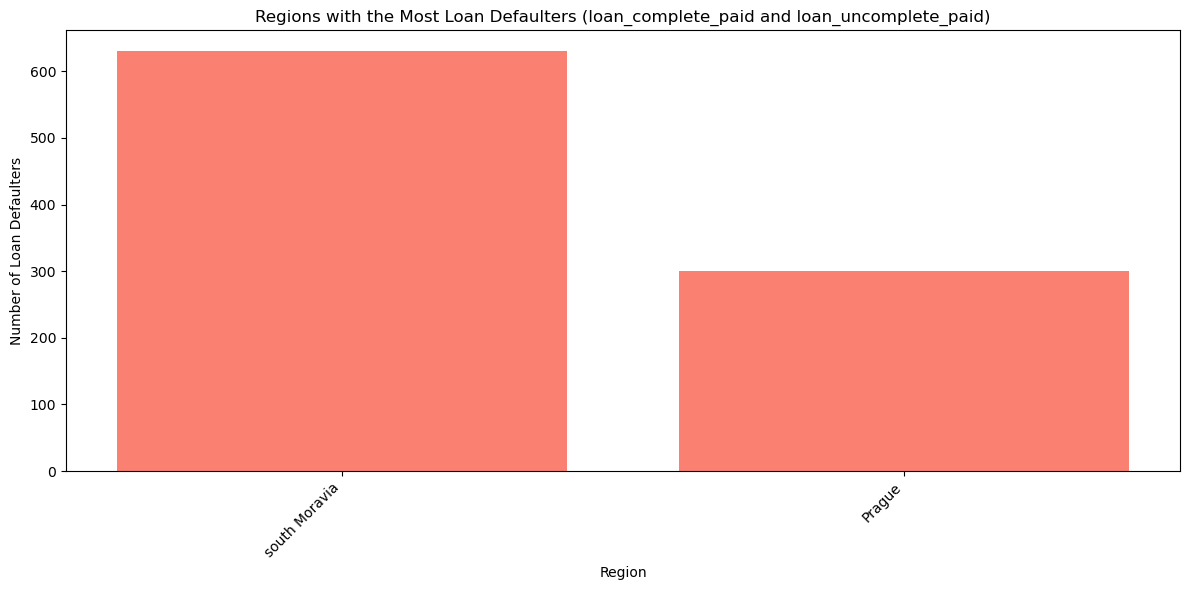

In [64]:
# Regions having the most loan defaulters

loan_defaulters = dataset[dataset.status.isin(['loan_client_debt', 'loan_complete_unpaid'])]

region_loan_defaulters = loan_defaulters.groupby('region')['status'].count().reset_index()

region_loan_defaulters = region_loan_defaulters.sort_values(by='status', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(region_loan_defaulters['region'], region_loan_defaulters['status'], color='salmon')
plt.xlabel('Region')
plt.ylabel('Number of Loan Defaulters')
plt.title('Regions with the Most Loan Defaulters (loan_complete_paid and loan_uncomplete_paid)')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


#### The barchart below shows the regions with the most loan defaulters, with south Moravia having the highest defaulters 
#### with over 600 defaulters while prague comes second with an estimate of 300 defaulters.


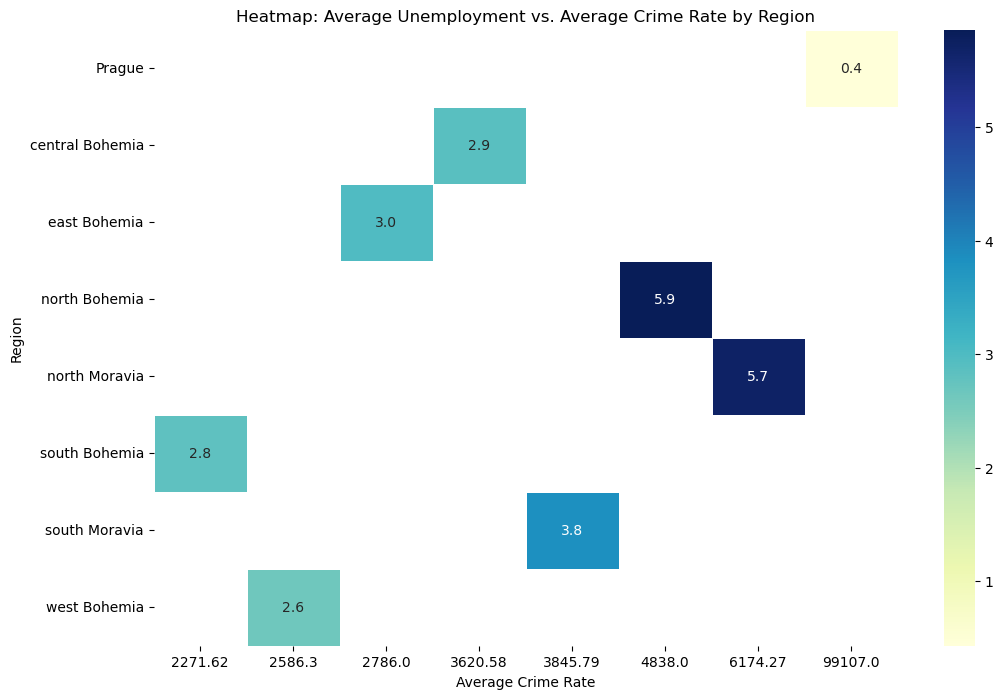

In [65]:
# Relationship between average unemployment rate and the average crime rate in each region

pivot_table = dataset.pivot_table(index='region', columns='average_crime', values='average_unemployment')


plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_table,
    cmap='YlGnBu',  
    annot=True,     
    fmt='.1f',      
    cbar=True,     
    linewidths=0.5 
)

# Plot the heatmap
plt.xlabel('Average Crime Rate')
plt.ylabel('Region')
plt.title('Heatmap: Average Unemployment vs. Average Crime Rate by Region')
plt.show()



#### The heatmap below shows the correlation between several regions, their employment rate and it's crime rate. 
#### Prague shows a positive significance with a low employment rate at 0.4 and a high crime rate at 99,107. while south 
#### Bohemia recorded the lowest crime rate with an unemployment rate of 2.8.


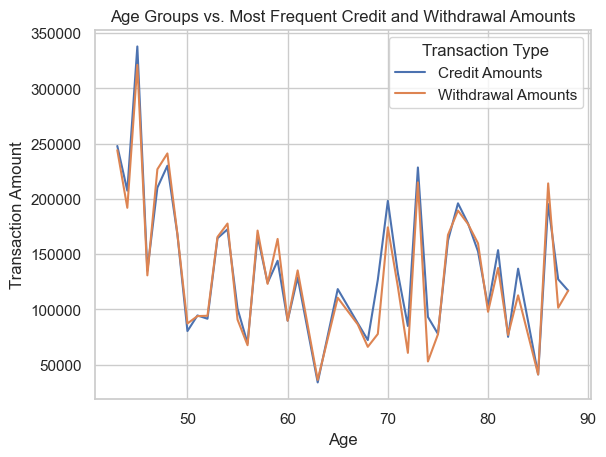

In [66]:
sns.set(style="whitegrid")


credit_data = dataset[dataset['trans_type'] == 'Credit']

withdrawal_data = dataset[dataset['trans_type'] == 'Withdrawal']

sns.lineplot(x="age", y="amount", data=credit_data, ci=None, label="Credit Amounts")

sns.lineplot(x="age", y="amount", data=withdrawal_data, ci=None, label="Withdrawal Amounts")

# Plot the lineplot
plt.title("Age Groups vs. Most Frequent Credit and Withdrawal Amounts")
plt.xlabel("Age")
plt.ylabel("Transaction Amount")
plt.legend(title="Transaction Type")
plt.show()


#### The lineplot below interprets a higher transaction both credit and Withdrawals among people below the age 50, while lowest
#### transaction was observed among the ages 60 - 70. 


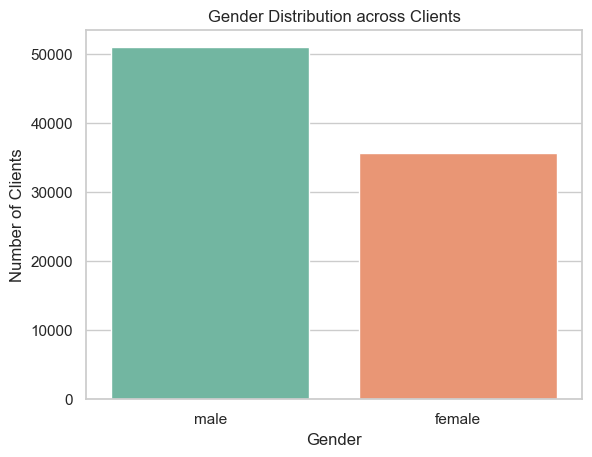

In [67]:
# Gender Distribution across clients

gender_counts = dataset['gender'].value_counts()

# Create a bar plot
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='Set2')
plt.title('Gender Distribution across Clients')
plt.xlabel('Gender')
plt.ylabel('Number of Clients')
plt.show()

#### The Gender distribution below shows their are more Male clients than Females with Males ranging above 50,000 and females
#### between 30,000 and 40,000


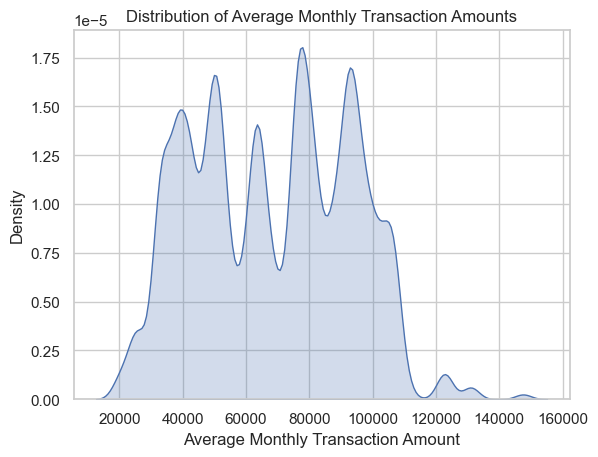

In [68]:
# Distribution of Average monthly transaction

# create a Kernel Density Estimate
sns.kdeplot(data=dataset, x='avg_trans_permonth', shade=True)
plt.title('Distribution of Average Monthly Transaction Amounts')
plt.xlabel('Average Monthly Transaction Amount')
plt.ylabel('Density')
plt.show()


#### The KDE above shows a high monthly transaction to range around 80,000.
#### Also, is shows there are no monthly transactions greater than 160,000 or
#### significantly lesser than 20,000


In [ ]:
# region
# crime
# unemployment
# Average salary